<a href="https://colab.research.google.com/github/jcfarese/MLA_JCF/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
#imports for pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#imports for sklearn
from sklearn.model_selection import train_test_split

In [3]:
# Load a dataset
data = pd.read_csv('/content/drive/MyDrive/CS430/Linear Regression Practice/data.csv')

In [4]:
# Check data
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [5]:
#Basic properties of the dataset

#Shape of the dataset
data.shape

#Column names
data.columns

#Data types of each column
data.dtypes

print(data.shape)
print(data.columns)
print(data.dtypes)

(11914, 16)
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [6]:
#Find and count missing values
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [7]:
#Summary Statistics of the numerical Columns
numerical_columns = data.select_dtypes(include=['number'])
numerical_columns.describe()

#The mean, median, min, max, and standard deviation of the numerical columns
numerical_columns.mean()
numerical_columns.median()
numerical_columns.min()
numerical_columns.max()
numerical_columns.std()

,0
Year,7.579740
Engine HP,109.191870
Engine Cylinders,1.780559
Number of Doors,0.881315
highway MPG,8.863001
city mpg,8.987798
Popularity,1441.855347
MSRP,60109.103604


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

In [16]:
#Target Variable
target_variable = 'MSRP'

#Distribution of the target variable
data[target_variable].describe()

,MSRP
count,11914.00
mean,40594.74
std,60109.10
min,2000.00
25%,21000.00
50%,29995.00
75%,42231.25
max,2065902.00


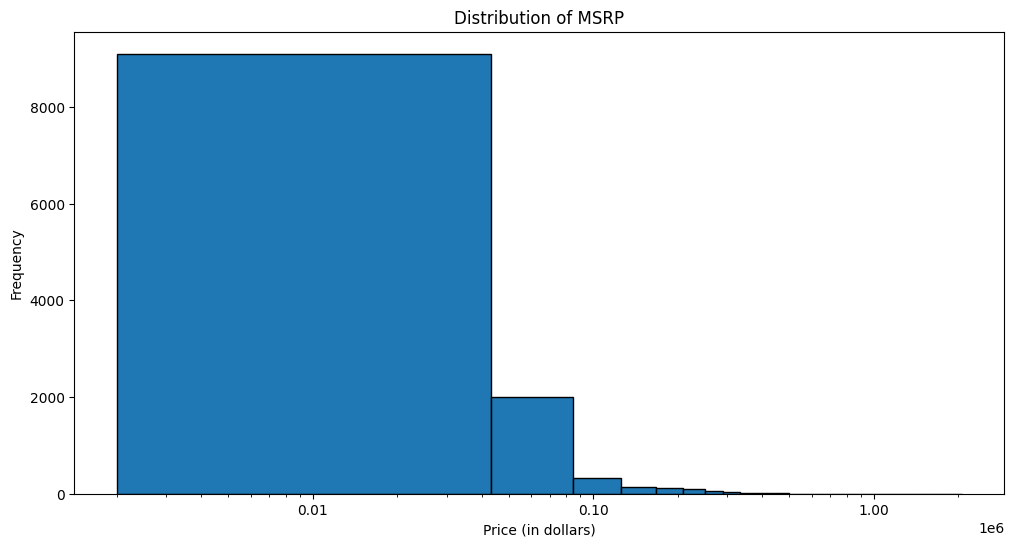

In [33]:
# Plot the histogram with a logarithmic scale on the x-axis
plt.figure(figsize=(12, 6))
plt.hist(data['MSRP'], bins=50, edgecolor='black')
plt.title('Distribution of MSRP')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')

# Set x-axis to logarithmic scale
plt.xscale('log')

# Use plain formatting for the x-axis labels
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())

#Show the plot
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

In [37]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                  Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.00       0.35             -0.04             0.26   
Engine HP         0.35       1.00              0.78            -0.10   
Engine Cylinders -0.04       0.78              1.00            -0.14   
Number of Doors   0.26      -0.10             -0.14             1.00   
highway MPG       0.26      -0.41             -0.62             0.12   
city mpg          0.20      -0.44             -0.60             0.12   
Popularity        0.07       0.04              0.04            -0.05   
MSRP              0.23       0.66              0.53            -0.13   

                  highway MPG  city mpg  Popularity  MSRP  
Year                     0.26      0.20        0.07  0.23  
Engine HP               -0.41     -0.44        0.04  0.66  
Engine Cylinders        -0.62     -0.60        0.04  0.53  
Number of Doors          0.12      0.12       -0.05 -0.13  
highway MPG              1.00      0.89       -0.02

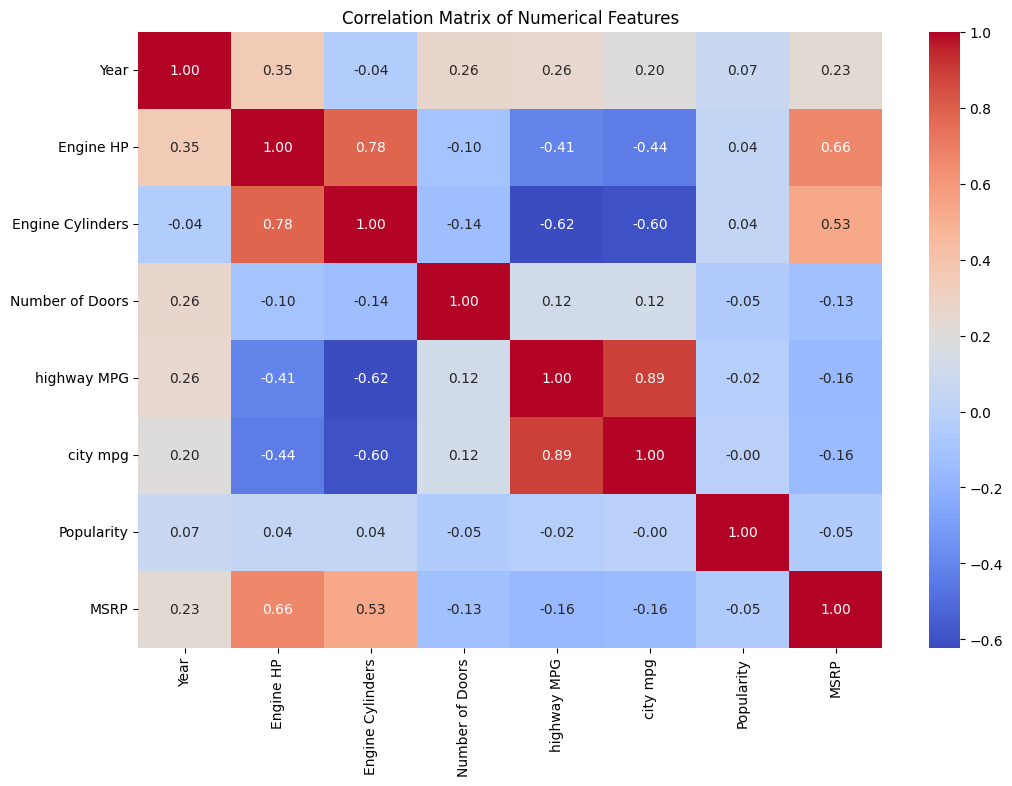

In [38]:
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [39]:
# Display correlations of all features with the target variable 'MSRP'
target_correlations = correlation_matrix['MSRP'].sort_values(ascending=False)
print(target_correlations)

MSRP                1.00
Engine HP           0.66
Engine Cylinders    0.53
Year                0.23
Popularity         -0.05
Number of Doors    -0.13
city mpg           -0.16
highway MPG        -0.16
Name: MSRP, dtype: float64


### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

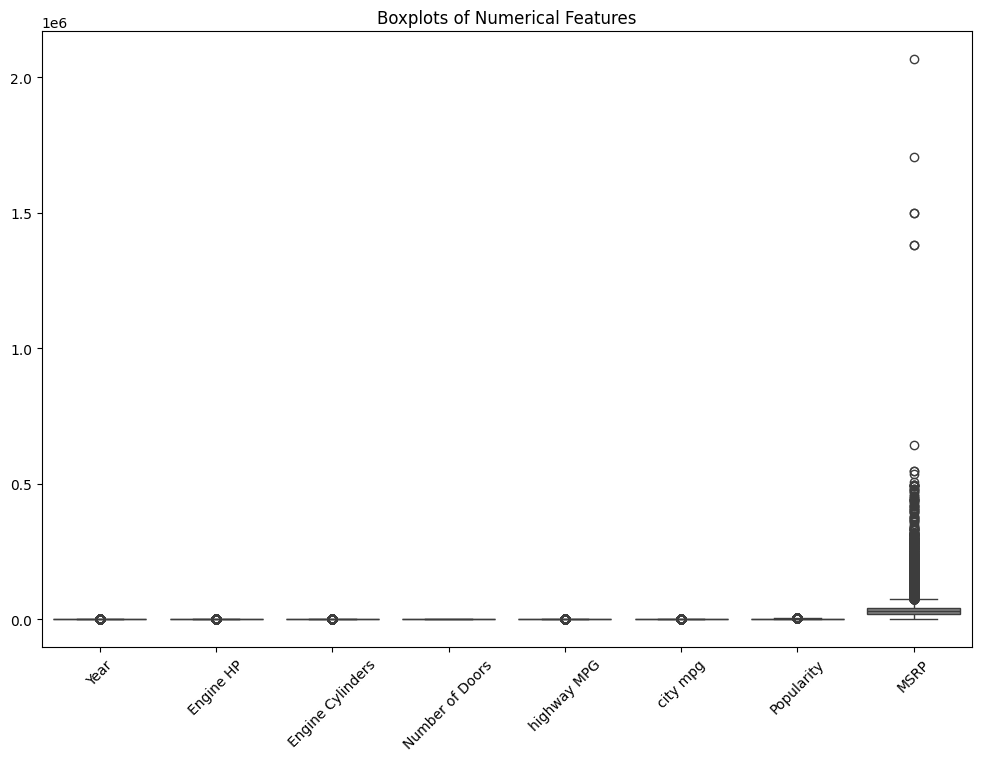

In [40]:
#Boxplots to identify potential outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

The outliers are extreme enough and should be dealt with some other way.  If the outliers are extreme enough they could skew the data and distort everything.  The better option would be to transform them.

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [41]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64


In [45]:
#Correcting Missing info by replacing it with the median to ensure it does not skew the data
numerical_columns_to_fill = ['Engine HP', 'Engine Cylinders', 'Number of Doors']
for column in numerical_columns_to_fill:
    data[column].fillna(data[column].median(), inplace=True)

# Handle missing values in categorical columns by filling with 'Unknown'
categorical_columns_to_fill = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
                               'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
data[categorical_columns_to_fill] = data[categorical_columns_to_fill].fillna('Unknown')

<ipython-input-45-6e326bfea79f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [46]:
# Check for missing values after cleaning
missing_values_after_cleaning = data.isnull().sum()
print("Missing values in each column after cleaning:")
print(missing_values_after_cleaning[missing_values_after_cleaning > 0])

Missing values in each column after cleaning:
Series([], dtype: int64)


In [48]:
#Check for duplicate rows that need to be handled
duplicates = data.duplicated()
print(f"Number of duplicated rows: {duplicates.sum()}")
print(data[duplicates])

Number of duplicated rows: 715
         Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)     230.00   
18       Audi       100  1992             regular unleaded     172.00   
20       Audi       100  1992             regular unleaded     172.00   
24       Audi       100  1993             regular unleaded     172.00   
25       Audi       100  1993             regular unleaded     172.00   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded      95.00   
11603   Volvo      XC60  2017             regular unleaded     302.00   
11604   Volvo      XC60  2017             regular unleaded     240.00   
11708  Suzuki       XL7  2008             regular unleaded     252.00   
11717  Suzuki       XL7  2008             regular unleaded     252.00   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14         

In [50]:
#Remove all of the duplicate data and recheck to ensure all duplicates have been removed
if duplicates.sum() > 0:
    data.drop_duplicates(inplace=True)

#Check for duplicate rows that need to be handled
duplicates_after_removal = data.duplicated()
print(f"Number of duplicated rows: {duplicates_after_removal.sum()}")
print(data[duplicates_after_removal])

Number of duplicated rows: 0
Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


### Split into features and target

In [51]:
#Split the data into features and target

#features
X = data.drop(columns=['MSRP'])

#Target
y = data['MSRP']

### Feature Engineering

In [53]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Print the identified columns
print("Numerical columns:")
print(numerical_features)
print("\nCategorical columns:")
print(categorical_features)

Numerical columns:
Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

Categorical columns:
Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')


### Preprocessing Pipelines

In [58]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object'))])


### Create a function to build and evaluate models using pipelines

In [60]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [62]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [63]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 140772881.6361
R² Score: 0.9709
--------------------------------------------------
Model: Ridge
Mean Squared Error: 400364322.7273
R² Score: 0.9174
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137023643782.39139, tolerance: 3154786404.6895366
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 154603929.6607
R² Score: 0.9681
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 1450972138.7915
R² Score: 0.7005
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 258545351.7427
R² Score: 0.9466
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

linear_pipeline:
*   Mean Squared Error: 140772881.6361
*   R² Score: 0.9709
*   This model performs very well, with the highest R² score of 0.9709 among all the models. This indicates a 97.09% of the variance in the target variable of MSRP. The relatively low MSE suggests the model makes accurate predictions. The simple linear regression model works well likely because the relationship between the features and the target variable is mostly linear.


ridge_pipeline:
*   Mean Squared Error: 400364322.7273
*   R² Score: 0.9174
*   This model introduces regularization to reduce overfitting by penalizing large coefficients. However, in this case, it has a higher MSE and a lower R² score compared to the linear pipeline. This suggests that regularization is not significantly improving the model, potentially because overfitting might not be a critical issue with this dataset.


lasso_pipeline:
*   Mean Squared Error: 154603929.6607
*   R² Score: 0.9681
*   This model also adds regularization but can shrink some coefficients to zero, effectively performing feature selection. The R² score is quite high at 0.9681, indicating good performance, though slightly lower than the simple linear model. The convergence warning indicates that the model struggled to find an optimal solution within the designated number of iterations. Increasing the number of iterations might improve its performance.


sgd_pipeline:
*   Mean Squared Error: 1450972138.7915
*   R² Score: 0.7005
*   This model, which uses stochastic gradient descent, performs poorly compared to the others, with a much higher MSE and a significantly lower R² score. This suggests that the model is not capturing the relationships in the data well. Its performance could be influenced by hyperparameters such as the learning rate, which may require improvement for better results.

polynomial_pipeline:
*   Mean Squared Error: 258545351.7427
*   R² Score: 0.9466
*   This model attempts to fit a nonlinear relationship by including polynomial features. While the R² score is quite high at 0.9466, it still isnt as high as the simple linear regression model. This might indicate that the added complexity of polynomial terms does not necessarily lead to a better fit, potentially due to overfitting or noise in the dataset.



The Linear Pipeline performed the best with the lowest MSE of 140,772,881.6361 and the highest R² score of 0.9709. This suggests that a simple linear model is sufficient to capture the relationships in your dataset, indicating a predominantly linear relationship between the features and the target variable MSRP.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.